In [123]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pprint
%matplotlib notebook

(901, 992)
array([[ 1210.117,  1212.865,  1214.372, ...,  1347.888,  1360.449,  1341.3  ],
       [ 1210.26 ,  1211.721,  1214.38 , ...,  1352.261,  1358.853,
         1338.337],
       [ 1210.324,  1211.028,  1214.214, ...,  1355.234,  1356.508,
         1336.748],
       ..., 
       [ 1177.825,  1177.825,  1177.825, ...,  1177.825,  1177.825,
         1177.825],
       [ 1177.825,  1177.825,  1177.825, ...,  1177.825,  1177.825,
         1177.825],
       [ 1177.825,  1177.825,  1177.825, ...,  1177.825,  1177.825,
         1177.825]])


<IPython.core.display.Javascript object>


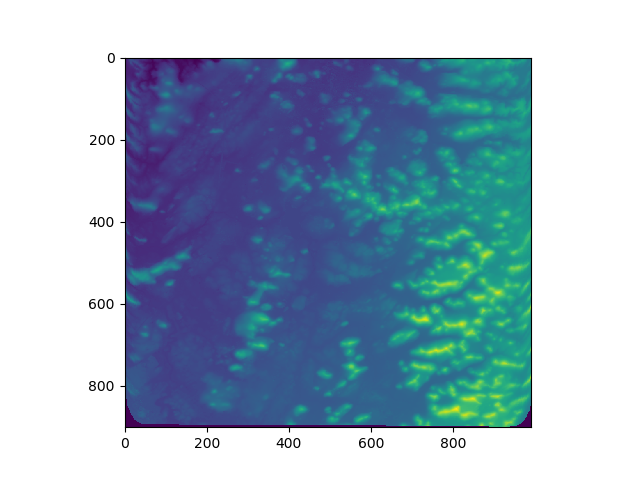

In [124]:
data =  np.loadtxt('data.np')
print(data.shape)
data = data
pprint.pprint(data)
plt.figure()
plt.imshow(data)
plt.show()

In [55]:
data =  np.loadtxt('data.np')
print(data.shape)
data = data[160:220,670:750]
pprint.pprint(data)

(901, 992)
array([[ 1274.174,  1273.766,  1273.382, ...,  1281.977,  1282.243,
         1282.509],
       [ 1274.487,  1274.301,  1274.221, ...,  1282.168,  1282.587,
         1283.28 ],
       [ 1274.549,  1274.871,  1274.837, ...,  1282.274,  1283.143,
         1284.212],
       ..., 
       [ 1290.962,  1291.681,  1291.958, ...,  1289.686,  1290.083,
         1291.871],
       [ 1291.403,  1291.747,  1292.164, ...,  1289.781,  1289.903,
         1291.378],
       [ 1292.016,  1291.988,  1292.105, ...,  1290.408,  1290.633,
         1290.985]])


<IPython.core.display.Javascript object>


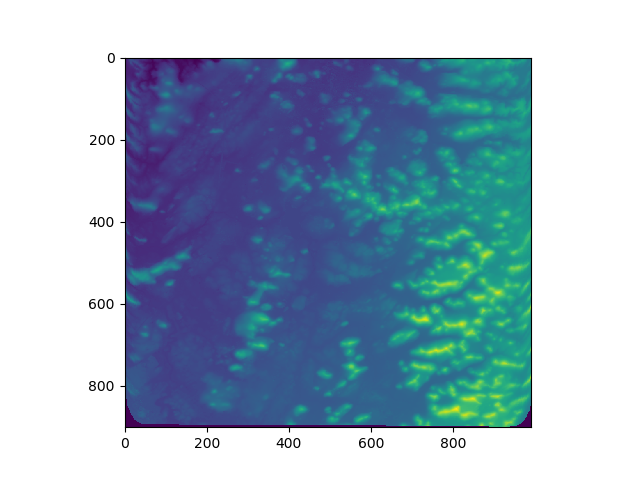

In [125]:
plt.figure()
plt.imshow(data)
plt.show()

<IPython.core.display.Javascript object>


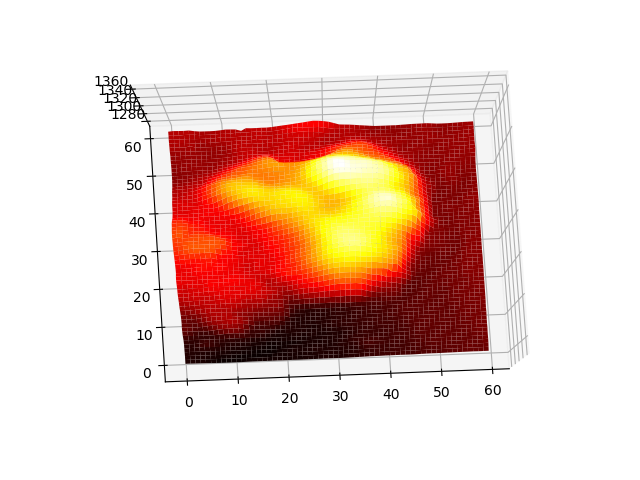

In [54]:

xs, ys = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
# z = calculate_R(xs, ys)
zs = xs**2 + ys**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs, ys, data, rstride=1, cstride=1, cmap='hot')
plt.savefig('całość png')
plt.show()

In [126]:
import numpy as np
import scipy.ndimage.filters as filters

def filter_map(data):
    kernel = np.array([
        [0, 0, 1, 0, 0],
        [0, 1, 1, 1, 0],
        [1, 1, 2, 1, 1],
        [0, 1, 1, 1, 0],
        [0, 0, 1, 0, 0]
    ])
    kernel = kernel/14
    filtered_data = filters.convolve(data, kernel)
    return filtered_data

In [127]:
data_new=filter_map(data)

<IPython.core.display.Javascript object>


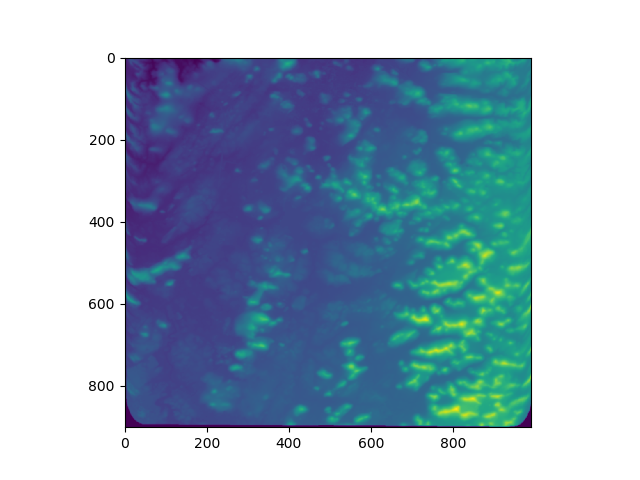

In [128]:
plt.figure()
plt.imshow(data_new)
plt.show()

In [66]:
data_minus=data-data_new

<IPython.core.display.Javascript object>


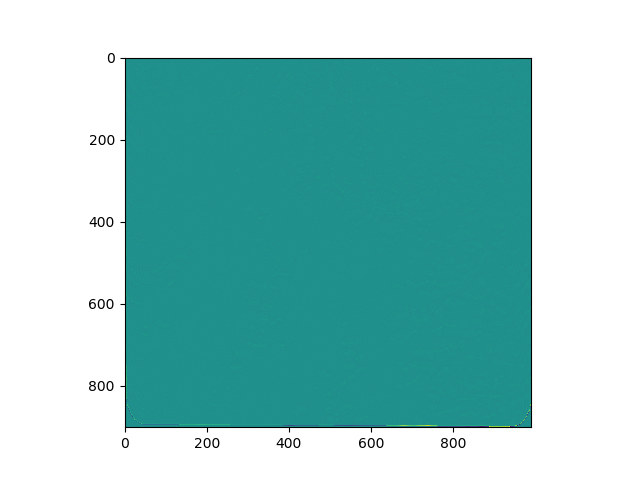

In [129]:
plt.figure()
plt.imshow(data_minus)
plt.show()

In [154]:
data_new=filter_map(data[0:200,0:200])

In [155]:
from skimage.feature import peak_local_max
def find_maximas(data):
    coordinates = peak_local_max(data, min_distance=1)
    return coordinates

In [156]:
cord=find_maximas(data_new)

In [157]:
len(cord)

20

In [158]:
import scipy.ndimage
labeled_image, number_of_objects = scipy.ndimage.label(cord)

In [159]:
def show_maximas(coordinates, data):
    zeros = np.zeros(data.shape)
    print(zeros.shape)
    print(data.shape)
    for coordinate in coordinates:
        zeros[coordinate[0], coordinate[1]] = 200
        
   
    
    plt.figure()
    plt.imshow(data + zeros)
    plt.show()

(60, 80)
(60, 80)


<IPython.core.display.Javascript object>


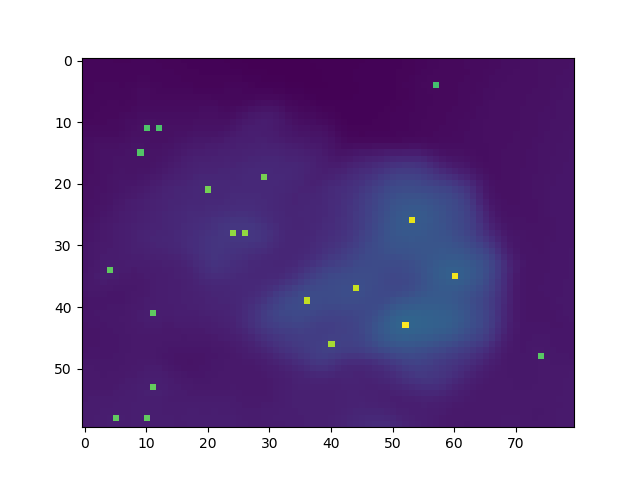

In [160]:
show_maximas(cord,data_new)

<IPython.core.display.Javascript object>


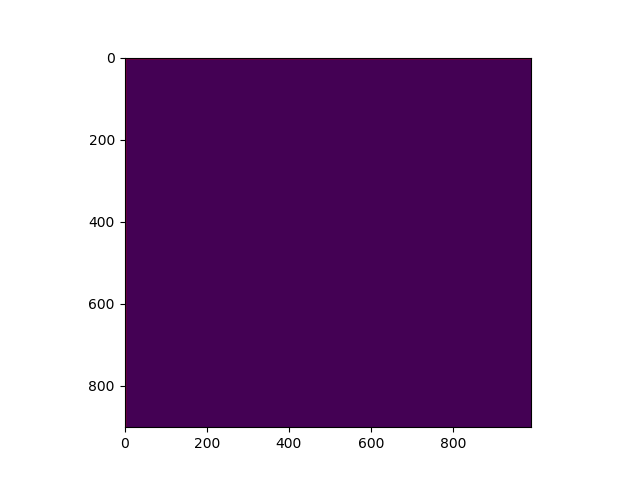

In [140]:
import matplotlib

plt.figure()
ax3 = plt.subplot(111)

labeled_image, number_of_objects = scipy.ndimage.label(data_new)
peak_slices = scipy.ndimage.find_objects(labeled_image)

ax3.imshow(labeled_image) 


for peak_slice in peak_slices:  #Draw some rectangles around the objects
    dy,dx  = peak_slice
    xy     = (dx.start, dy.start)
    width  = (dx.stop - dx.start + 10)
    height = (dy.stop - dy.start + 10)
    rect = matplotlib.patches.Rectangle(xy,width,height,fc='none',ec='red')
    ax3.add_patch(rect,)
plt.show()

<IPython.core.display.Javascript object>


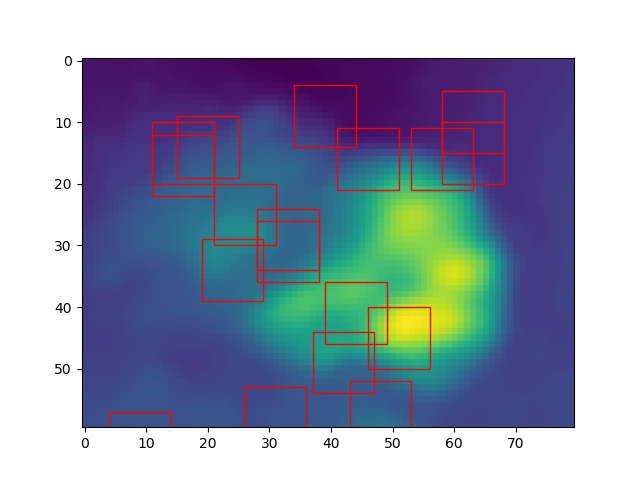

In [161]:
fig,ax=plt.subplots(1)

ax.imshow(data_new)
for i in cord:
    rect = matplotlib.patches.Rectangle((i[0],i[1]),10,10,linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
plt.show()

<IPython.core.display.Javascript object>


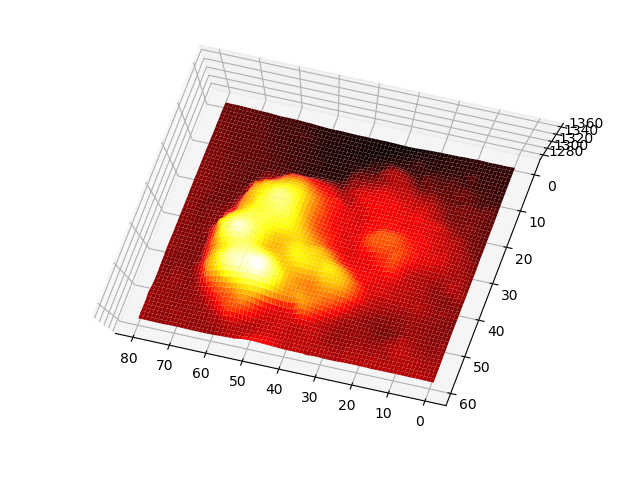

In [162]:

xs, ys = np.meshgrid(np.arange(data_new.shape[1]), np.arange(data.shape[0]))
# z = calculate_R(xs, ys)
zs = xs**2 + ys**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs, ys, data, rstride=1, cstride=1, cmap='hot')
plt.savefig('całość png')
plt.show()